# Clustering and Heatmaps

* Using data taken from: https://github.com/tidyverse/nycflights13/tree/main/data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
import seaborn as sns

In [7]:
import pyreadr
from folium.plugins import MarkerCluster

In [12]:
result = pyreadr.read_r("Data/flights.rda")
flights_df = result["flights"]

In [15]:
result = pyreadr.read_r("Data/airports.rda")
airports_df = result["airports"]

In [18]:
airports_df = airports_df[airports_df["lon"] < 0]

In [62]:
airports_df.columns = airports_df.columns.str.strip()

In [21]:
airports_df["name"] = airports_df["name"].astype("str")

In [23]:
airports_df.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044.0,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264.0,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801.0,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523.0,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11.0,-5.0,A,America/New_York


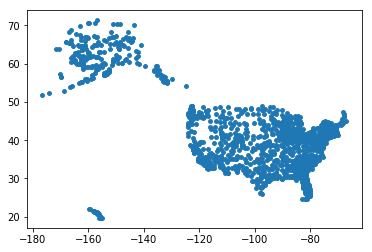

In [30]:
plt.scatter(x=airports_df["lon"], y=airports_df["lat"], s=15);

## K-Means

In [160]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dt.iloc[:,2:3])
y_kmeans = kmeans.predict(dt.iloc[:,2:3])

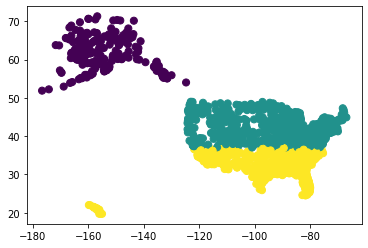

In [161]:
plt.scatter(dt.iloc[:, 3], dt.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X = airports_df[["lat", "lon"]]

In [38]:
X.head()

,lat,lon
0,41.130472,-80.619583
1,32.460572,-85.680028
2,41.989341,-88.101243
3,41.431912,-74.391561
4,31.074472,-81.427778


In [39]:
# Compute DBSCAN
db = DBSCAN(eps=1.5, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [44]:
 # Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 784


In [50]:
airports_df["label"] = labels.copy()

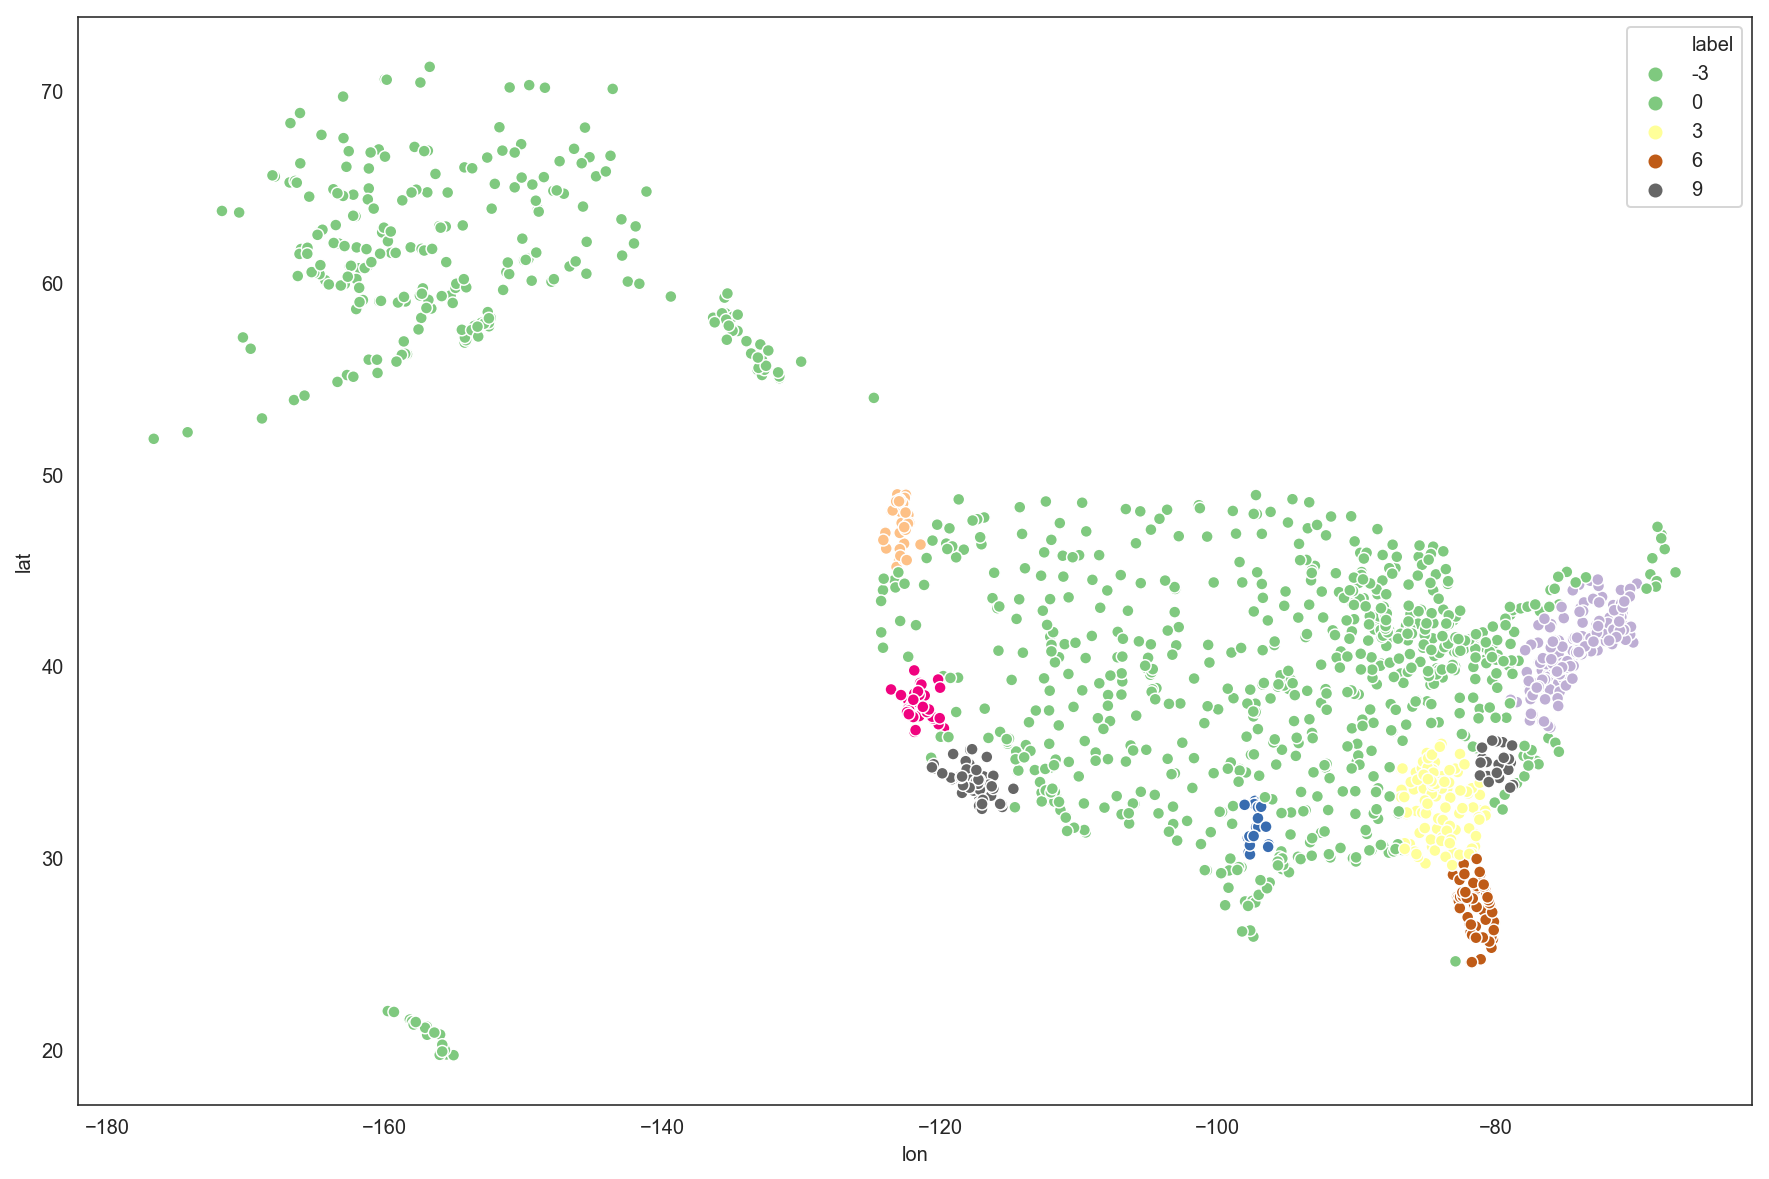

In [55]:
sns.set_style("white")
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x=airports_df["lon"], y=airports_df["lat"], data=airports_df, hue=airports_df["label"], ax=ax, palette="Accent")

# Plotted Map (clustered)

In [56]:
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [57]:
from convertbng import util as conv
from geopy import distance as ds

In [273]:
names = list(airports_df["name"]).copy()

In [59]:
locations = airports_df[["lat", "lon"]]
locationlist = locations.values.tolist()

In [60]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[42.9, -76.8], zoom_start=4, tiles='Stamen Terrain')
marker_cluster = MarkerCluster().add_to(map)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
minimap = plugins.MiniMap()
map.add_child(minimap)
map.add_child(folium.LatLngPopup())
from folium.plugins import MeasureControl
map.add_child(MeasureControl())
marker_cluster.save('plot_data.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=plot_data.html width=1000 height=650></iframe>')

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [64]:
from IPython.display import HTML
#grab a random sample from df
subset_of_df = airports_df.sample(n=100)
some_map = folium.Map(location=[subset_of_df["lat"].mean(), 
                                subset_of_df["lon"].mean()], 
                      zoom_start=5)
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in subset_of_df.itertuples():
    print(row.lat, row.lon, row.name)
    some_map.add_child(folium.Marker(location=[row.lat, row.lon], popup = row.name))
#some_map.save('plot_data.html')
# Import the Folium interactive html file

HTML("<iframe src=plot_data.html width=1000 height=650></iframe>")

38.893889 -119.995278 Lake Tahoe Airport
33.6323083 -83.8474472 Covington Municipal Airport
33.6316964 -85.1522641 West Georgia Regional Airport - O V Gray Field
63.6864 -170.493 Savoonga Airport
41.883611 -87.631667 All Airports
38.344167 -98.859167 Great Bend Municipal
32.3388 -82.591 W H Barron Field
34.185361 -79.723889 Florence Rgnl
59.960833 -162.881111 Kongiganak Airport
40.714167 -74.005833 All Airports
35.414739 -97.386633 Tinker Afb
32.834219 -115.578744 Imperial Co
41.066959 -73.707575 Westchester Co
43.341222 -73.610305 Floyd Bennett Memorial Airport
37.7634 -99.9656 Dodge City Regional Airport
39.7561006 -84.8427175 Richmond Municipal Airport
32.411319 -99.681897 Abilene Rgnl
46.9711944 -123.9365556 Bowerman Field
38.138639 -78.452861 Charlottesville-Albemarle
32.719047 -98.891 Stephens Co
34.0953521 -117.2348722 San Bernardino International Airport
54.013333333333335 -124.76833333333333 Frazier Lake Airpark
35.0402222 -106.6091944 Albuquerque International Sunport
26.3785

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [67]:
from folium.plugins import MarkerCluster
some_map = folium.Map(location=[subset_of_df["INTPTLAT"].mean(), 
 subset_of_df["INTPTLONG"].mean()], 
 zoom_start=4)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in subset_of_df.itertuples():
    mc.add_child(folium.Marker(location=[row.INTPTLAT,  row.INTPTLONG],
                 popup=row.GEOID))
 
some_map.add_child(mc)
some_map

KeyError: 'INTPTLAT'

# HeatMap

In [70]:
popups = [str(i) for i in range(0, len(airports_df))] # Popups texts are simple numbers.

In [71]:
popups = [i for i in airports_df["faa"]] # Popups texts are simple numbers.

In [74]:
from IPython.display import HTML
from folium.plugins import HeatMap
from folium.plugins import MeasureControl

def generateBaseMap(default_location=[42.9, -76.8], default_zoom_start=4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap()
HeatMap(data=airports_df[["lat", "lon"]].
        groupby(["lat", "lon"]).sum().reset_index().values.tolist(), 
        radius=8, max_zoom=13).add_to(base_map)
# Adds tool to the top right
base_map.add_child(MeasureControl())
base_map.save("plot_data.html")

HTML("<iframe src=plot_data.html width=1000 height=650></iframe>")

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
